In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

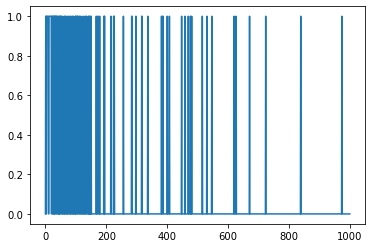

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5719 - accuracy: 0.7060 - binary_crossentropy: 0.5719 - val_loss: 0.4287 - val_accuracy: 0.8193 - val_binary_crossentropy: 0.4287
Epoch 2/20
49/49 - 0s - loss: 0.3647 - accuracy: 0.8478 - binary_crossentropy: 0.3647 - val_loss: 0.3447 - val_accuracy: 0.8545 - val_binary_crossentropy: 0.3447
Epoch 3/20
49/49 - 0s - loss: 0.3211 - accuracy: 0.8672 - binary_crossentropy: 0.3211 - val_loss: 0.3309 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3309
Epoch 4/20
49/49 - 0s - loss: 0.3080 - accuracy: 0.8724 - binary_crossentropy: 0.3080 - val_loss: 0.3279 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3279
Epoch 5/20
49/49 - 0s - loss: 0.3007 - accuracy: 0.8764 - binary_crossentropy: 0.3007 - val_loss: 0.3322 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3322
Epoch 6/20
49/49 - 0s - loss: 0.2960 - accuracy: 0.8775 - binary_crossentropy: 0.2960 - val_loss: 0.3269 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3269
Epoch 7/20
49/49 - 0s - loss

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6817 - accuracy: 0.5886 - binary_crossentropy: 0.6817 - val_loss: 0.6633 - val_accuracy: 0.6580 - val_binary_crossentropy: 0.6633
Epoch 2/20
49/49 - 0s - loss: 0.6382 - accuracy: 0.6842 - binary_crossentropy: 0.6382 - val_loss: 0.6153 - val_accuracy: 0.7087 - val_binary_crossentropy: 0.6153
Epoch 3/20
49/49 - 0s - loss: 0.5875 - accuracy: 0.7489 - binary_crossentropy: 0.5875 - val_loss: 0.5677 - val_accuracy: 0.7916 - val_binary_crossentropy: 0.5677
Epoch 4/20
49/49 - 0s - loss: 0.5419 - accuracy: 0.7977 - binary_crossentropy: 0.5419 - val_loss: 0.5288 - val_accuracy: 0.8194 - val_binary_crossentropy: 0.5288
Epoch 5/20
49/49 - 0s - loss: 0.5065 - accuracy: 0.8266 - binary_crossentropy: 0.5065 - val_loss: 0.4995 - val_accuracy: 0.8318 - val_binary_crossentropy: 0.4995
Epoch 6/20
49/49 - 0s - loss: 0.4796 - accuracy: 0.8424 - binary_crossentropy: 0.4796 - val_loss: 0.4783 - val_accuracy: 0.8424 - val_binary_crossentropy: 0.4783
Epoch 7/20
49/49 - 0s - loss

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4505 - accuracy: 0.7837 - binary_crossentropy: 0.4505 - val_loss: 0.3427 - val_accuracy: 0.8545 - val_binary_crossentropy: 0.3427
Epoch 2/20
49/49 - 0s - loss: 0.2941 - accuracy: 0.8798 - binary_crossentropy: 0.2941 - val_loss: 0.3202 - val_accuracy: 0.8611 - val_binary_crossentropy: 0.3202
Epoch 3/20
49/49 - 0s - loss: 0.2355 - accuracy: 0.9056 - binary_crossentropy: 0.2355 - val_loss: 0.3337 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3337
Epoch 4/20
49/49 - 0s - loss: 0.1209 - accuracy: 0.9629 - binary_crossentropy: 0.1209 - val_loss: 0.4073 - val_accuracy: 0.8501 - val_binary_crossentropy: 0.4073
Epoch 5/20
49/49 - 0s - loss: 0.0287 - accuracy: 0.9946 - binary_crossentropy: 0.0287 - val_loss: 0.5081 - val_accuracy: 0.8485 - val_binary_crossentropy: 0.5081
Epoch 6/20
49/49 - 0s - loss: 0.0053 - accuracy: 0.9998 - binary_crossentropy: 0.0053 - val_loss: 0.6107 - val_accuracy: 0.8507 - val_binary_crossentropy: 0.6107
Epoch 7/20
49/49 - 0s - loss

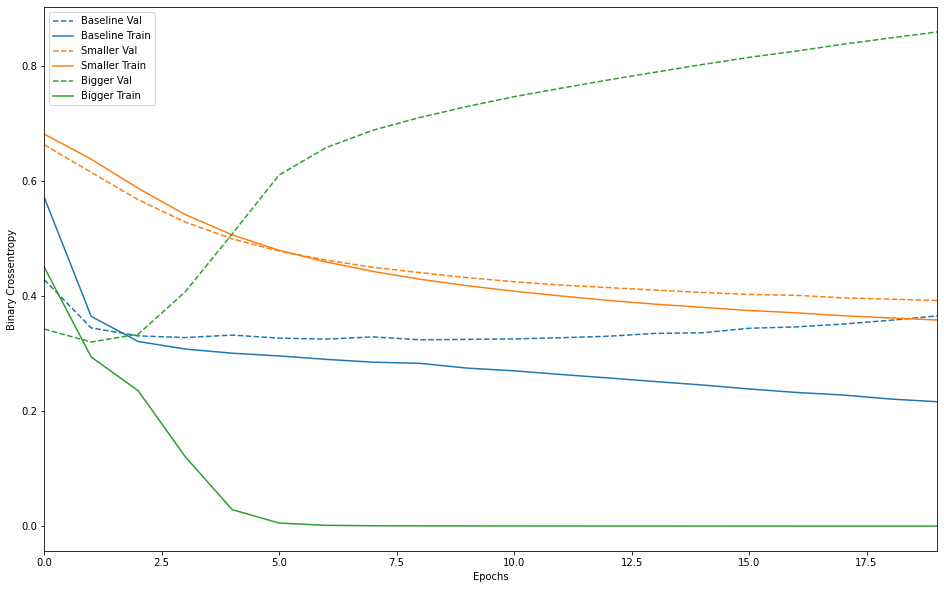

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6424 - accuracy: 0.6837 - binary_crossentropy: 0.5983 - val_loss: 0.4986 - val_accuracy: 0.8011 - val_binary_crossentropy: 0.4567
Epoch 2/20
49/49 - 0s - loss: 0.4166 - accuracy: 0.8429 - binary_crossentropy: 0.3749 - val_loss: 0.3854 - val_accuracy: 0.8547 - val_binary_crossentropy: 0.3442
Epoch 3/20
49/49 - 0s - loss: 0.3607 - accuracy: 0.8683 - binary_crossentropy: 0.3200 - val_loss: 0.3698 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3299
Epoch 4/20
49/49 - 0s - loss: 0.3447 - accuracy: 0.8740 - binary_crossentropy: 0.3056 - val_loss: 0.3654 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3271
Epoch 5/20
49/49 - 0s - loss: 0.3390 - accuracy: 0.8748 - binary_crossentropy: 0.3014 - val_loss: 0.3638 - val_accuracy: 0.8597 - val_binary_crossentropy: 0.3268
Epoch 6/20
49/49 - 0s - loss: 0.3342 - accuracy: 0.8758 - binary_crossentropy: 0.2976 - val_loss: 0.3608 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3247
Epoch 7/20
49/49 - 0s - loss

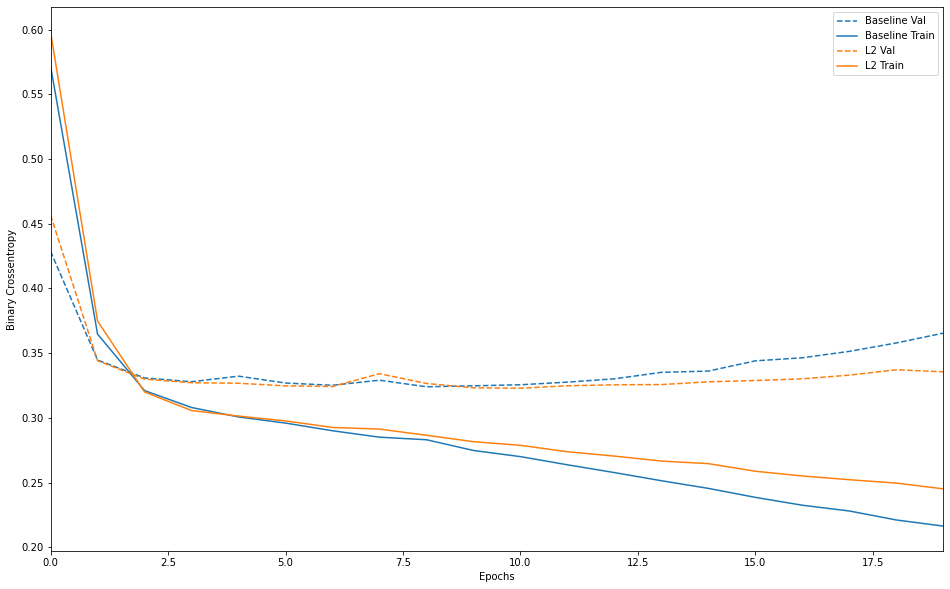

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6870 - accuracy: 0.5464 - binary_crossentropy: 0.6870 - val_loss: 0.6488 - val_accuracy: 0.6995 - val_binary_crossentropy: 0.6488
Epoch 2/20
49/49 - 0s - loss: 0.6155 - accuracy: 0.6664 - binary_crossentropy: 0.6155 - val_loss: 0.5217 - val_accuracy: 0.8174 - val_binary_crossentropy: 0.5217
Epoch 3/20
49/49 - 0s - loss: 0.5346 - accuracy: 0.7419 - binary_crossentropy: 0.5346 - val_loss: 0.4235 - val_accuracy: 0.8405 - val_binary_crossentropy: 0.4235
Epoch 4/20
49/49 - 0s - loss: 0.4780 - accuracy: 0.7804 - binary_crossentropy: 0.4780 - val_loss: 0.3764 - val_accuracy: 0.8480 - val_binary_crossentropy: 0.3764
Epoch 5/20
49/49 - 0s - loss: 0.4295 - accuracy: 0.8064 - binary_crossentropy: 0.4295 - val_loss: 0.3428 - val_accuracy: 0.8556 - val_binary_crossentropy: 0.3428
Epoch 6/20
49/49 - 0s - loss: 0.4024 - accuracy: 0.8259 - binary_crossentropy: 0.4024 - val_loss: 0.3312 - val_accuracy: 0.8583 - val_binary_crossentropy: 0.3312
Epoch 7/20
49/49 - 0s - loss

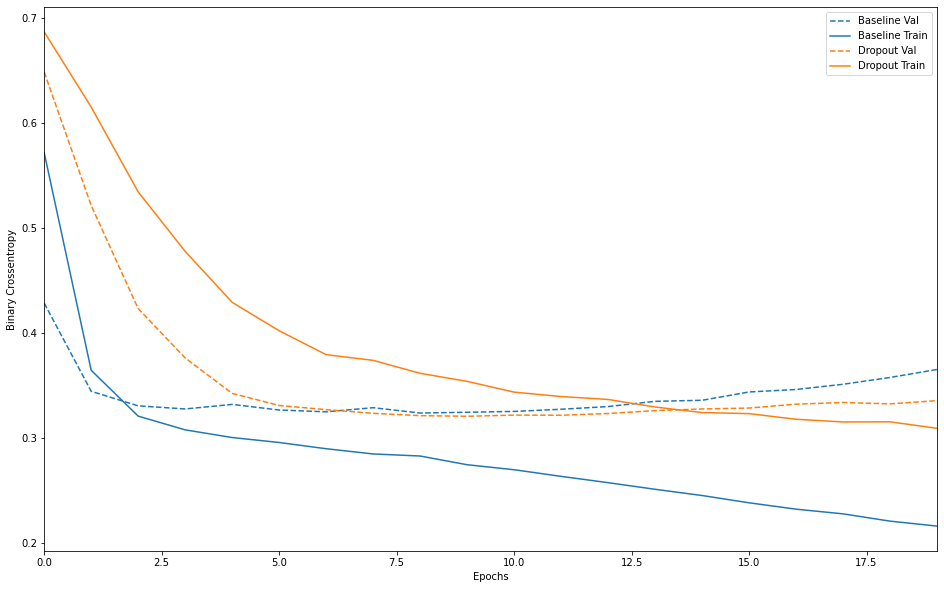

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])